In [44]:
# to perform algebraic calculation
import numpy as np

# to operate the datasets and dataframes
import pandas as pd


# to convert data into standard form
from sklearn.preprocessing import StandardScaler

# to visualize data
import seaborn as sns

# to plot graphs
import matplotlib.pyplot as plt
import matplotlib.cm as cm



# filter the warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# read dataset
df_customer_seg = pd.read_csv('/content/drive/MyDrive/Internship tasks/Shopping Mall Customer Segmentation Data .csv')

# print first five rows of data set
df_customer_seg.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


##Check on Data Types

In [47]:
df_customer_seg.dtypes

,0
Customer ID,object
Age,int64
Gender,object
Annual Income,int64
Spending Score,int64


All data types are appropriate.

In [48]:
df_customer_seg.columns

Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')

# Reaarange columns

In [49]:
df_customer_seg.rename(columns={
    'Annual Income': 'annual_income',
    'Spending Score': 'spending_score',
    'Customer ID': 'customer_id',
    'Gender': 'gender',
    'Age': 'age',
}, inplace=True)


In [50]:
df_customer_seg.head()

,customer_id,age,gender,annual_income,spending_score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [51]:
df_customer_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     15079 non-null  object
 1   age             15079 non-null  int64 
 2   gender          15079 non-null  object
 3   annual_income   15079 non-null  int64 
 4   spending_score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB


## Checking   Value ranges / Invalid entries

In [52]:
df_customer_seg.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15079.0,54.191591,21.119207,18.0,36.0,54.0,72.0,90.0
annual_income,15079.0,109742.880562,52249.425866,20022.0,64141.0,109190.0,155008.0,199974.0
spending_score,15079.0,50.591617,28.726977,1.0,26.0,51.0,75.0,100.0


###Here age is not negative. Spending score range is between 1-100 and annual income does not contain negative values.

## checking Missing values

In [53]:
df_customer_seg.isnull().sum()

,0
customer_id,0
age,0
gender,0
annual_income,0
spending_score,0


No missing values found

### Checking Duplicate records

In [54]:
# getting the shape of dataframe
df_customer_seg.shape

(15079, 5)

In [55]:
df_d= df_customer_seg.copy()
df_d.drop_duplicates(subset=None,inplace=True)

In [56]:
df_d.shape

(15079, 5)

In [57]:
df_customer_seg.shape

(15079, 5)

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

# Check on Inconsistent Categories

In [59]:
df_customer_seg['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [61]:
df_customer_seg['gender'].value_counts()

,count
gender,
Male,7595
Female,7484


Gender categories are clean and consistent.

In [60]:
#Convert categorical variables
df_gender = pd.get_dummies(df_customer_seg.gender, dtype='int')
df_gender.head(4)

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1


In [62]:
#Combine df_gender with main dataframe
df_customer_seg = pd.concat([df_customer_seg, df_gender], axis=1)
df_customer_seg.head(4)

,customer_id,age,gender,annual_income,spending_score,Female,Male
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89,0,1
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95,1,0
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76,1,0
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57,0,1


Invalid Value Checks

In [71]:

print("Negative ages:", df_customer_seg[df_customer_seg['age'] < 0])
print("Spending Score > 100:", df_customer_seg[df_customer_seg['spending_score'] > 100])
print("Annual Income < 0:", df_customer_seg[df_customer_seg['annual_income'] < 0])

Negative ages: Empty DataFrame
Columns: [customer_id, age, gender, annual_income, spending_score, Female, Male]
Index: []
Spending Score > 100: Empty DataFrame
Columns: [customer_id, age, gender, annual_income, spending_score, Female, Male]
Index: []
Annual Income < 0: Empty DataFrame
Columns: [customer_id, age, gender, annual_income, spending_score, Female, Male]
Index: []


# Check for Cardinality of Categorical Columns

In [63]:
df_customer_seg.nunique()

,0
customer_id,15079
age,73
gender,2
annual_income,14441
spending_score,100
Female,2
Male,2


 #Correlation Analysis

In [64]:
df_customer_seg.corr(numeric_only=True)

,age,annual_income,spending_score,Female,Male
age,1.000000,0.004776,-0.008251,-0.002034,0.002034
annual_income,0.004776,1.000000,0.003234,0.003038,-0.003038
spending_score,-0.008251,0.003234,1.000000,-0.006703,0.006703
Female,-0.002034,0.003038,-0.006703,1.000000,-1.000000
Male,0.002034,-0.003038,0.006703,-1.000000,1.000000


##Check for Outliers  (Numerical Columns)

In [66]:
numerical_cols = ['age', 'annual_income', 'spending_score']

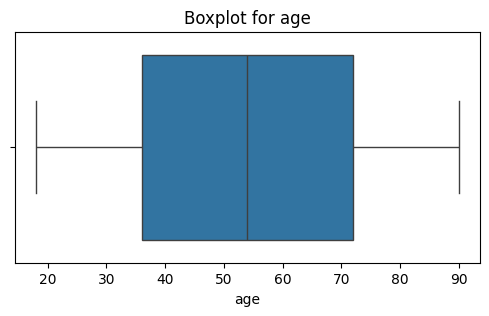

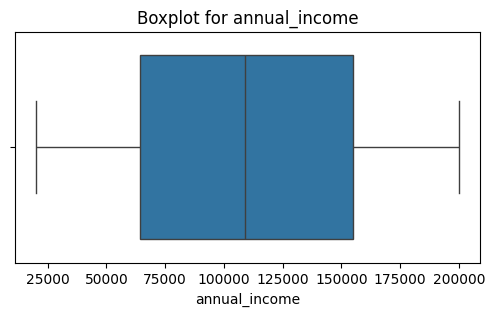

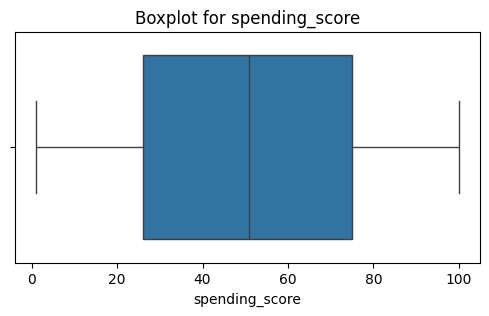

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_customer_seg[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

No outliers

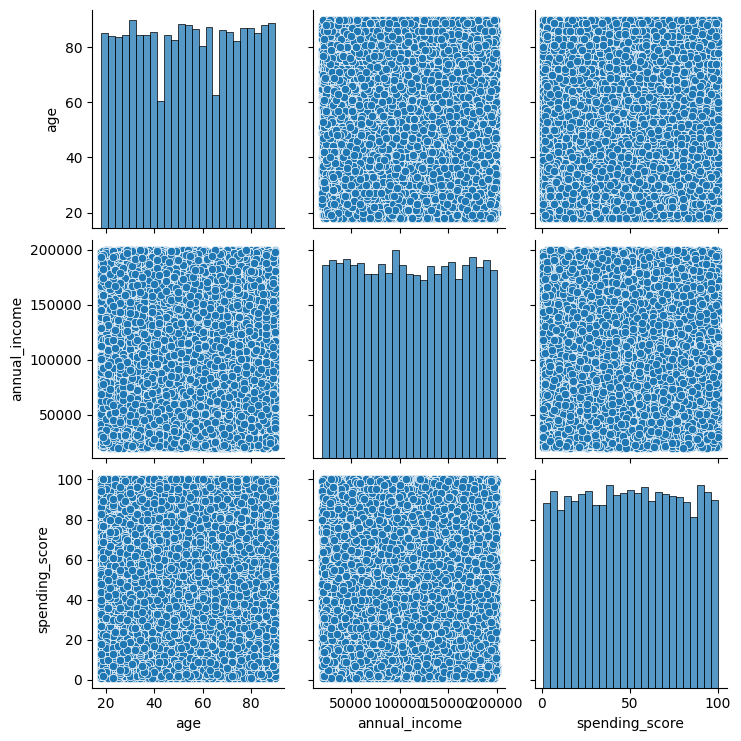

In [68]:
sns.pairplot(df_customer_seg[numerical_cols])
plt.show()

In [69]:
df_customer_seg.to_csv("Shopping Mall Customer Segmentation Data_cleaned.csv", index=False)